In [49]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
df = pd.read_csv('NIFTY__50.csv',index_col='Date',parse_dates=True)

In [52]:
df.head()

,Index Name,Open,High,Low,Close
Date,,,,,
1995-01-02,NIFTY 50,-,-,-,1182.1
1995-01-03,NIFTY 50,-,-,-,1176.8
1995-01-04,NIFTY 50,-,-,-,1163.7
1995-01-05,NIFTY 50,-,-,-,1150.0
1995-01-06,NIFTY 50,-,-,-,1130.3


In [53]:
df.shape

(7265, 5)

In [54]:
df.describe()

,Close
count,7265.000000
mean,6035.542986
std,5334.827748
min,788.150000
25%,1305.950000
50%,4940.950000
75%,8715.600000
max,22493.550000


# Data Visualization

<Axes: xlabel='Date'>

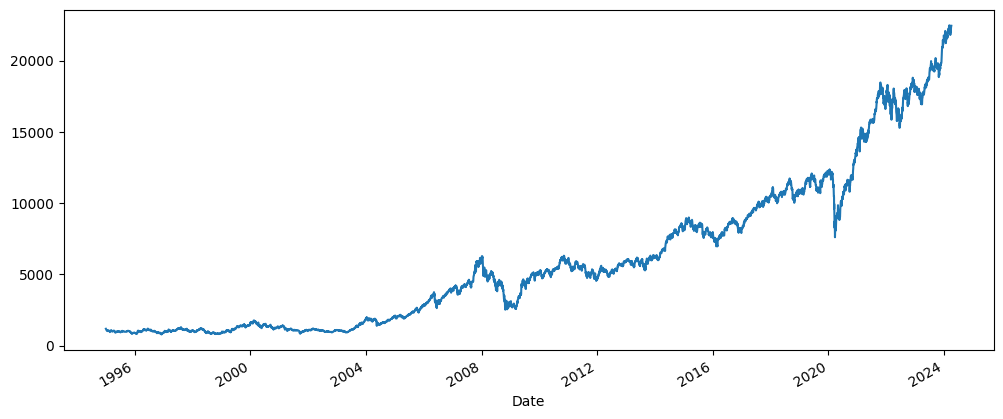

In [55]:
df['Close'].plot(figsize=(12,5))

Data is Non-Stationary.

In [56]:
df['Close'].shift(1)

Date
1995-01-02         NaN
1995-01-03     1182.10
1995-01-04     1176.80
1995-01-05     1163.70
1995-01-06     1150.00
                ...   
2024-03-22    22011.95
2024-03-26    22096.75
2024-03-27    22004.70
2024-03-28    22123.65
2024-04-01    22326.90
Name: Close, Length: 7265, dtype: float64

In [57]:
df['Close_new']=df['Close'] - df['Close'].shift(1)

In [58]:
# df.dropna(axis=0,inplace=True)
df = df[1:]

<Axes: xlabel='Date'>

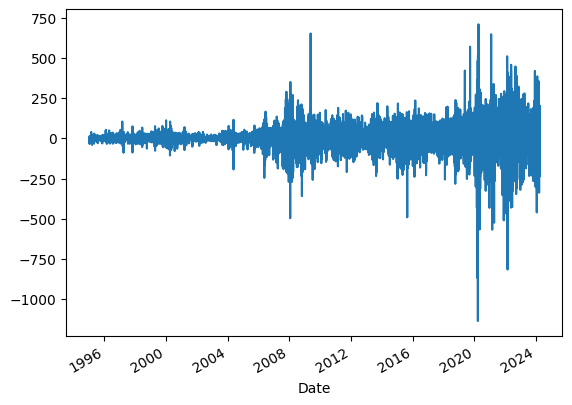

In [59]:
df['Close_new'].plot()

In [74]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    dftest = adfuller(dataset,autolag = 'AIC')
    print("1.ADF:",dftest[0])
    print("2.P-value:",dftest[1])
    print("3.Num of Lags",dftest[2])
    print("4.Num of Observations Used for ADF Regression and Critical Values Calculation",dftest[3])
    print("5.Critical Values:")
    for key, val in dftest[4].items():
        print("\t",key,":",val)

In [75]:
ad_test(df['Close_new'])

1.ADF: -14.747478563690613
2.P-value: 2.5149880809797567e-27
3.Num of Lags 36
4.Num of Observations Used for ADF Regression and Critical Values Calculation 7227
5.Critical Values:
	 1% : -3.431255164549562
	 5% : -2.8619400119863294
	 10% : -2.5669829221919653


In [76]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [63]:
stepwise_fit = auto_arima(df['Close_new'], trace=True,suppress_warnings= True)
stepwise_fit.summary()
'''
AIC (Akaike Information Criterion) is a metric used to compare the goodness of fit of models while 
penalizing for complexity. A lower AIC value indicates a better model.
'''

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=3.06 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=89497.645, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=87548.967, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.82 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=89495.645, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=86804.953, Time=0.25 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=86264.460, Time=0.26 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=85868.674, Time=0.41 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=85800.938, Time=0.42 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=4.28 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=3.30 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=85798.941, Time=0.27 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=85866.677, Time=0.23 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=inf, Time=2.08 sec
 ARIMA(4,1,1)(0,0,0)[0]             : AIC=inf, Ti

'\nAIC (Akaike Information Criterion) is a metric used to compare the goodness of fit of models while \npenalizing for complexity. A lower AIC value indicates a better model.\n'

In [77]:
from statsmodels.tsa.arima.model import ARIMA

In [78]:
#Split data into training and testing
print(df.shape)
train=df.iloc[:-400]
test=df.iloc[-400:]
print(train.shape,test.shape)

(7264, 6)
(6864, 6) (400, 6)


In [66]:
#training the model
model =ARIMA(train['Close_new'],order=(5,1,0))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Close_new   No. Observations:                 6864
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -40179.627
Date:                Sat, 11 May 2024   AIC                          80371.255
Time:                        20:38:47   BIC                          80412.258
Sample:                             0   HQIC                         80385.398
                               - 6864                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8050      0.005   -168.898      0.000      -0.814      -0.796
ar.L2         -0.6472      0.007    -94.758      0.000      -0.661      -0.634
ar.L3         -0.4993      0.008    -63.675      0.000      -0.515      -0.484
ar.L4         -0.3177      0.007    -43.311      0.000      -0.332      -0.303
ar.L5         -0.1006      0.005    -19.005      0.000      -0.111      -0.090
sigma2      7127.7764     44.689    159.497      0.000    7040.187    7215.366
===================================================================================
Ljung-Box (L1) (Q):                   2.32   Jarque-Bera (JB):             73620.34
Prob(Q):                              0.13   Prob(JB):                         0.00
Heteroskedasticity (H):              37.24   Skew:                             0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [79]:
start = len(train)
end = len(train) + len(test)-1
pred=model.predict(start=start,end=end,type='levels')
print(pred)
pred.index=df.index[start:end+1]
print(pred)

6864    24.988759
6865    28.569000
6866    21.071220
6867    -9.022005
6868   -31.424376
          ...    
7259    -6.759397
7260    -6.759397
7261    -6.759397
7262    -6.759397
7263    -6.759397
Name: predicted_mean, Length: 400, dtype: float64
Date
2022-08-22    24.988759
2022-08-23    28.569000
2022-08-24    21.071220
2022-08-25    -9.022005
2022-08-26   -31.424376
                ...    
2024-03-22    -6.759397
2024-03-26    -6.759397
2024-03-27    -6.759397
2024-03-28    -6.759397
2024-04-01    -6.759397
Name: predicted_mean, Length: 400, dtype: float64


<Axes: xlabel='Date'>

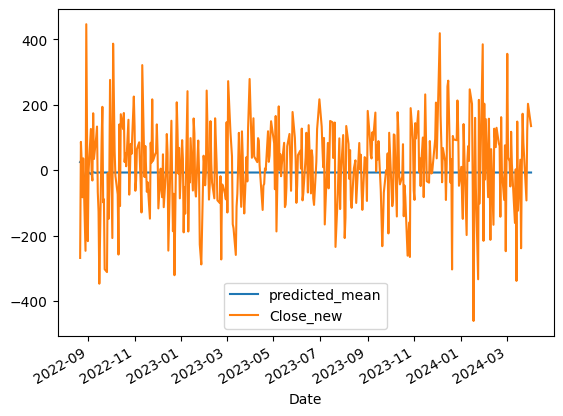

In [80]:
pred.plot(legend=True)
test['Close_new'].plot(legend=True)

In [81]:
new = pred + df[:-400]['Close'].iloc[-1]

In [82]:
new

Date
2022-08-22    17783.438759
2022-08-23    17787.019000
2022-08-24    17779.521220
2022-08-25    17749.427995
2022-08-26    17727.025624
                  ...     
2024-03-22    17751.690603
2024-03-26    17751.690603
2024-03-27    17751.690603
2024-03-28    17751.690603
2024-04-01    17751.690603
Name: predicted_mean, Length: 400, dtype: float64

<Axes: xlabel='Date'>

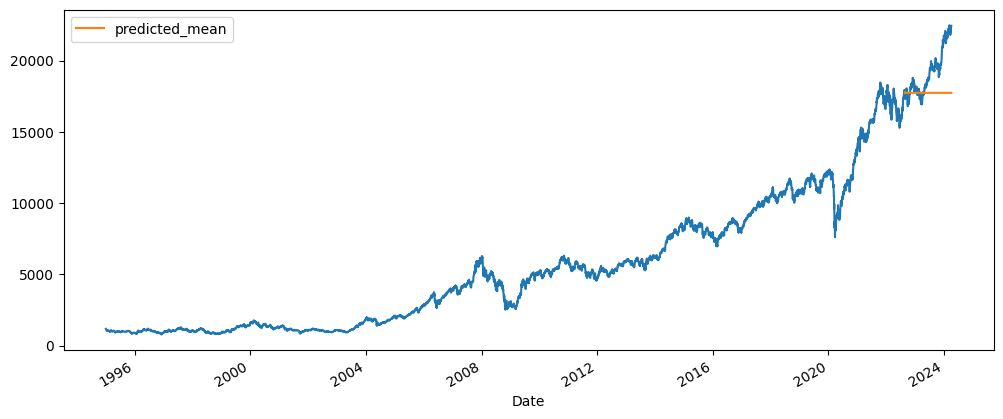

In [71]:
df["Close"].plot()
new.plot(figsize=(12,5),legend=True)